In [1]:
%load_ext autoreload
%autoreload 2

from util_zoe.zoealgorithm import algorithm_DG
from util import *
from pastalgorithm import algorithm_DP,algorithm_GA
from myalgorithm import algorithm

## 개별 문제 실행

In [2]:
# (200, 3163.692499999999, 100.38160228729248)
# 3144.5495,3120
# (200, 2607.3195000000005, 100.10932207107544)
problem_file = './stage1_problem/STAGE1_1.json'
timelimit = 60

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-11
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 7 5825U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 103 rows, 283 columns and 566 nonzeros
Model fingerprint: 0xcbde285c
Variable types: 0 continuous, 283 integer (283 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+03, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 795120.10000
Presolve removed 103 rows and 283 columns
Presolve time: 0.02s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 732213 795120 

Optimal solution found (tolerance 1.00e-04)
Best 

In [6]:

problem_file = './stage1_problem/STAGE1_14.json'
timelimit = 60

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 7 5825U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 103 rows, 292 columns and 584 nonzeros
Model fingerprint: 0xd9901eb3
Variable types: 0 continuous, 292 integer (292 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+03, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 841799.40000
Presolve removed 103 rows and 292 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 789875 841799 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.898751000000e+05, best bound 7.898751000000e+05, gap 0.0000%
Best obj = 7898.75

KeyboardInterrupt: 

In [ ]:
draw_route_solution(ALL_ORDERS, checked_solution)

In [ ]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)

## 전체 문제 실행

In [15]:
avg_cost = []

In [5]:
# baseline='avg_cost': 4903.952,
# 'avg_cost': 4118.8099999999995,
# problem_file = 'STAGE1_1.json'
# avg_cost = []
for i in range(1,19):

    problem_file = f'./stage1_problem/STAGE1_{i}.json'
    timelimit = 60
    # np.random.seed(1)

    with open(problem_file, 'r') as f:
        prob = json.load(f)

    K = prob['K']

    ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
    ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

    DIST = np.array(prob['DIST']) # 100*100 주문,도착지 pair가 order 50개에 들어있음.
    for r in ALL_RIDERS:
        r.T = np.round(DIST/r.speed + r.service_time) # T라는 속성에 커스텀 거리 행렬 들어감.

    alg_start_time = time.time()

    exception = None

    solution = None
  
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
    

    alg_end_time = time.time()
    print(f'total elapsed time : {alg_end_time-alg_start_time}')
    with open(problem_file, 'r') as f:
        prob = json.load(f)

    K = prob['K']

    ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
    ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

    DIST = np.array(prob['DIST'])
    for r in ALL_RIDERS:
        r.T = np.round(DIST/r.speed + r.service_time)

    checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)
    avg_cost.append((K,checked_solution['avg_cost'],alg_end_time-alg_start_time))

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 7 5825U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 103 rows, 283 columns and 566 nonzeros
Model fingerprint: 0xcbde285c
Variable types: 0 continuous, 283 integer (283 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+03, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 795120.10000
Presolve removed 103 rows and 283 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 732213 795120 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.322130000000e+05, best bound 7.322130000000e+05, gap 0.0000%
Best obj = 7322.13

KeyboardInterrupt: 

In [17]:
avg_cost

[(100, 3696.946, 60.257017850875854),
 (100, 3254.788, 60.24116277694702),
 (200, 3167.2309999999998, 60.246896266937256),
 (200, 2611.561499999999, 60.09549880027771),
 (300, 2293.509000000001, 62.93651556968689),
 (300, 2232.8269999999998, 68.95784735679626),
 (100, 3373.25, 60.35172462463379),
 (100, 3198.705999999999, 60.24065613746643),
 (200, 3246.5880000000006, 60.31089520454407),
 (200, 2485.8915000000006, 60.06370735168457),
 (300, 2622.465999999999, 60.94999313354492),
 (300, 2297.2776666666673, 60.286561012268066),
 (100, 4871.557999999999, 60.42997860908508),
 (100, 4133.828999999999, 60.20862364768982),
 (200, 4463.302, 60.363598346710205),
 (200, 3277.537999999999, 60.12009310722351),
 (300, 3707.261666666666, 60.19194936752319),
 (300, 3116.766666666665, 60.1371648311615)]

## 주문 수 별 평균 계산

In [7]:

# 100일 때와 200일 때의 avg_cost 합계와 개수를 계산
sum_100 = sum_200 = count_100 = count_200 = count_300 = sum_300 = 0

for k, cost,_ in avg_cost:
    if k == 100:
        sum_100 += cost
        count_100 += 1
    elif k == 200:
        sum_200 += cost
        count_200 += 1
    elif k == 300:
        sum_300 += cost
        count_300 += 1


# 평균 계산
avg_100 = sum_100 / count_100 if count_100 != 0 else 0
avg_200 = sum_200 / count_200 if count_200 != 0 else 0

avg_300 = sum_300 / count_300 if count_300 != 0 else 0

# 결과를 리스트에 추가
avg_cost.append(('mean',100, avg_100))
avg_cost.append(('mean',200, avg_200))

avg_cost.append(('mean',300, avg_300))

avg_cost

[(100, 3703.5519999999988, 51.85564088821411),
 (100, 3231.5360000000005, 49.220664262771606),
 (200, 3167.998999999998, 68.1733558177948),
 (200, 2594.5184999999997, 69.9393458366394),
 (300, 2293.415333333334, 103.95905590057373),
 (300, 2190.561666666665, 112.75830340385437),
 (100, 3324.865999999999, 48.1410276889801),
 (100, 3148.32, 49.29255294799805),
 (200, 3263.3080000000004, 61.2805449962616),
 (200, 2484.035999999999, 74.36162304878235),
 (300, 2582.7256666666663, 89.21496057510376),
 (300, 2285.610666666667, 94.31976532936096),
 (100, 4903.9619999999995, 45.01773405075073),
 (100, 4119.0689999999995, 47.281322717666626),
 (200, 4446.4375, 58.226380825042725),
 (200, 3251.769, 76.60381817817688),
 (300, 3707.261666666666, 88.07614612579346),
 (300, 3106.004666666666, 99.83372092247009),
 ('mean', 100, 3738.550833333333),
 ('mean', 200, 3201.3446666666664),
 ('mean', 300, 2694.263277777777)]

In [8]:
with open('algorithm_dynamic_gurobi_local_search_q_dynamic.txt', 'w') as file:
    for number in avg_cost:
        file.write(f"{number}\n")

## 문제 상황 그래프 

Error in callback <function _draw_all_if_interactive at 0x00000269F0F83C70> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

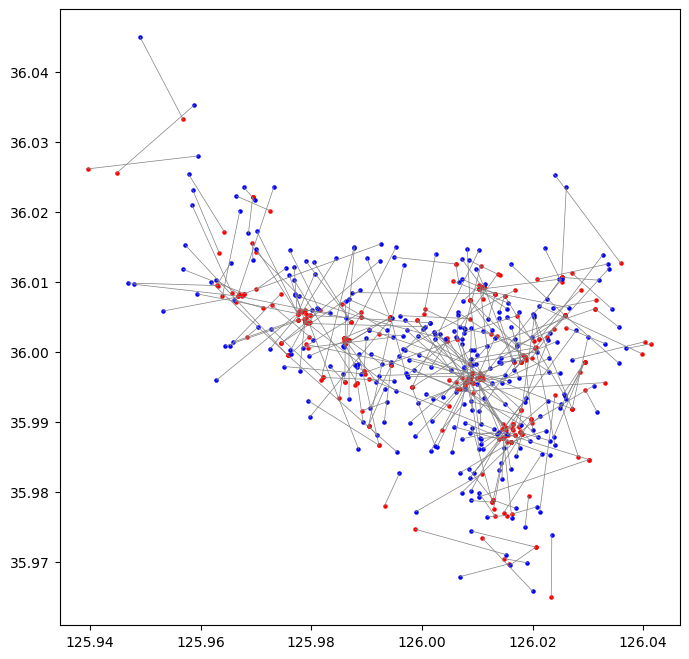

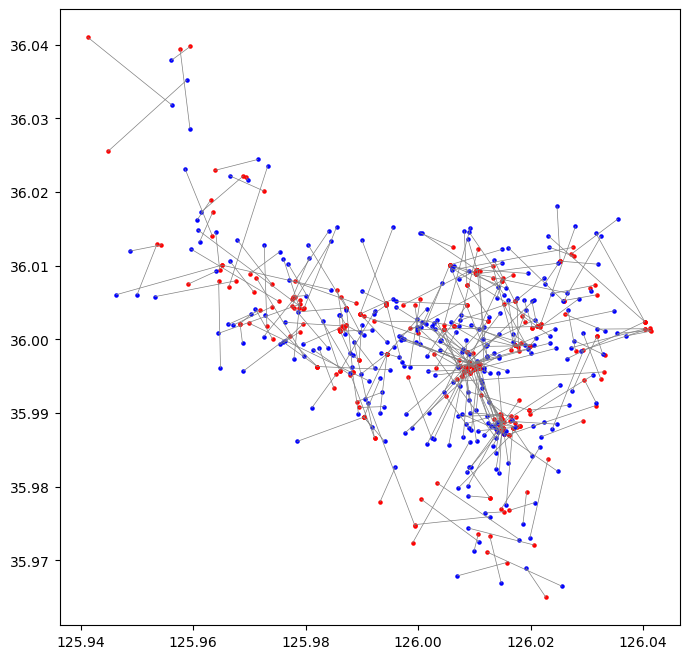

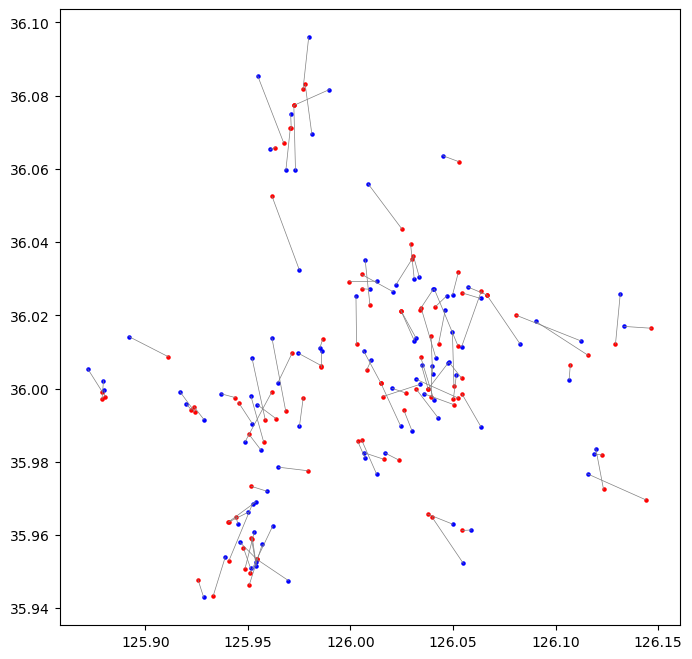

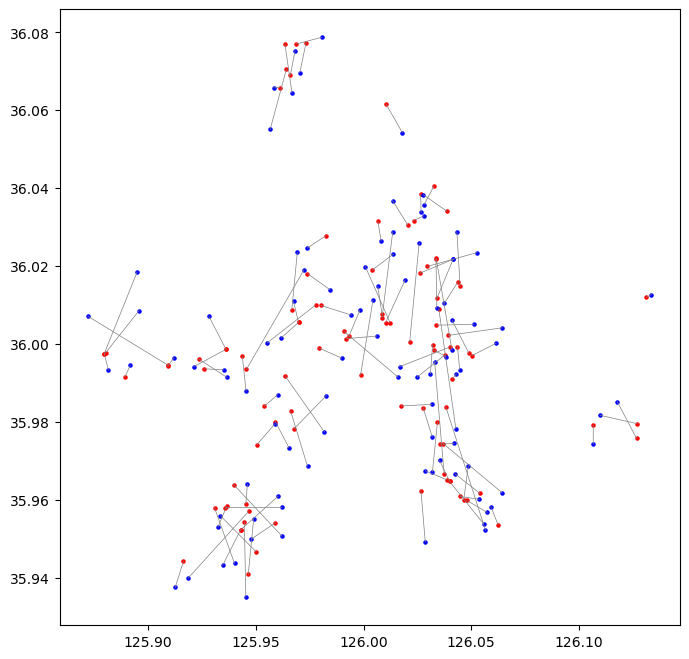

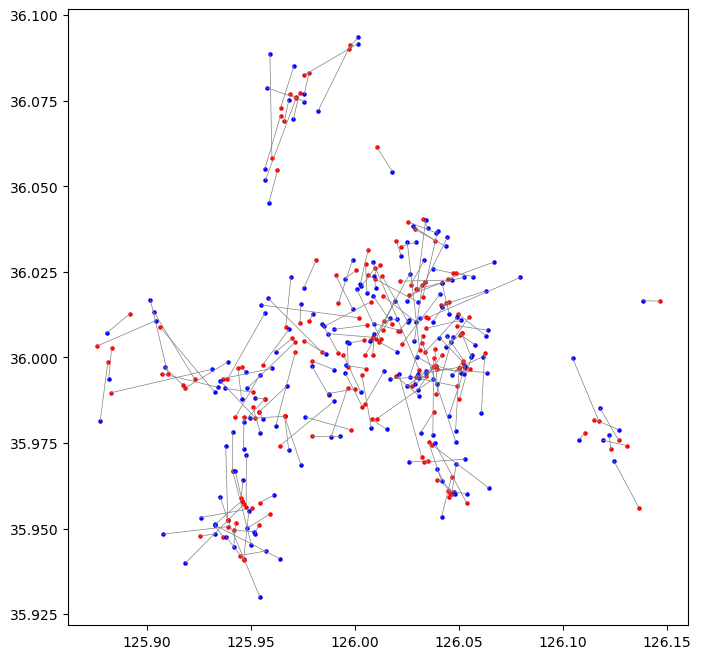

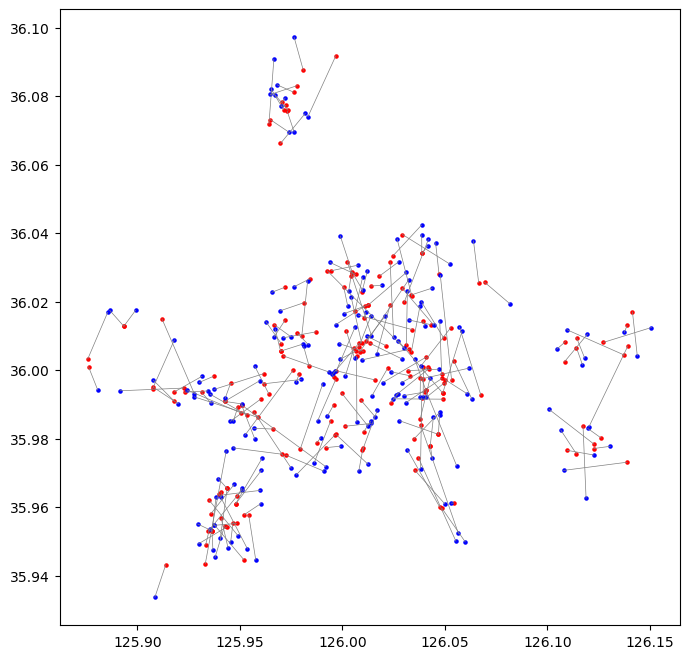

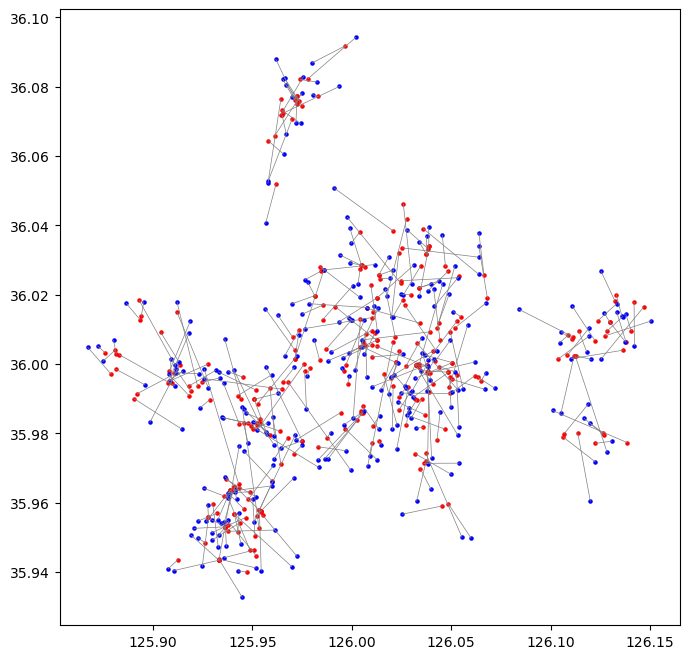

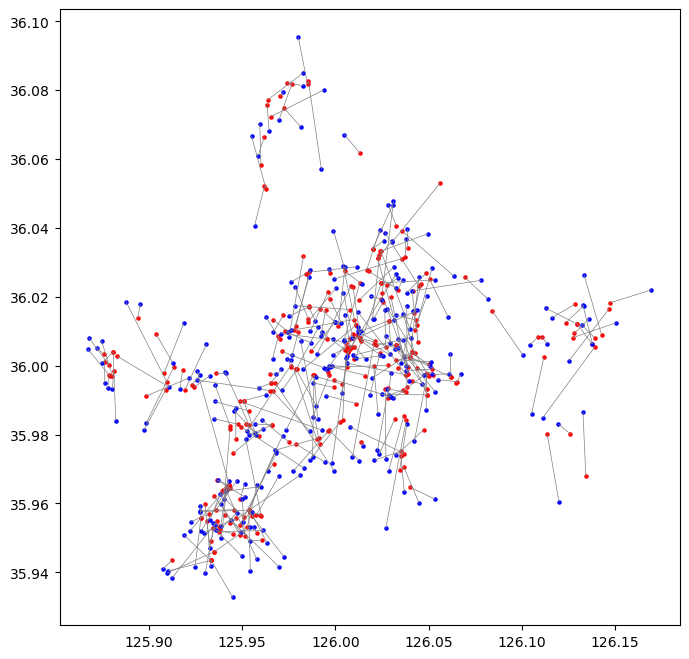

In [64]:
for i in range(10,18):
    
    problem_file = f'./stage1_problem/STAGE1_{i+1}.json'
    
    with open(problem_file, 'r') as f:
        prob = json.load(f)

    K = prob['K']
    ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
    plt.subplots(figsize=(8, 8))
    node_size = 5

    shop_x = [order.shop_lon for order in ALL_ORDERS]
    shop_y = [order.shop_lat for order in ALL_ORDERS]
    plt.scatter(shop_x, shop_y, c='red', s=node_size, label='SHOPS')

    dlv_x = [order.dlv_lon for order in ALL_ORDERS]
    dlv_y = [order.dlv_lat for order in ALL_ORDERS]
    plt.scatter(dlv_x, dlv_y, c='blue', s=node_size, label='DLVS')
    # 매장과 배송지를 잇는 선을 그립니다.
    for sx, sy, dx, dy in zip(shop_x, shop_y, dlv_x, dlv_y):
        plt.plot([sx, dx], [sy, dy], 'gray', linestyle='-', linewidth=0.5)  # 회색 선으로 매장과 배송지를 연결
